<a href="https://colab.research.google.com/github/aajrnvr/Dissertation/blob/main/knowledgeable_verbalizer_label_words_plot0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

finetune_8_path = '/content/num_8_finetune_seed_100.csv'
prompt_8_path = '/content/num_8_prompt_seed_100.csv'

finetune_16_path = '/content/num_16_finetune_seed_100.csv'
prompt_16_path = '/content/num_16_prompt_seed_100.csv'

finetune_32_path = '/content/num_32_finetune_seed_100.csv'
prompt_32_path = '/content/num_32_prompt_seed_100.csv'

finetune_64_path = '/content/num_64_finetune_seed_100.csv'
prompt_64_path = '/content/num_64_prompt_seed_100.csv'

finetune_128_path = '/content/num_128_finetune_seed_100.csv'
prompt_128_path = '/content/num_128_prompt_seed_100.csv'

finetune_256_path = '/content/num_256_finetune_seed_100.csv'
prompt_256_path = '/content/num_256_prompt_seed_100.csv'

# - - - - - -  - - - -  -- - - - - --- - ---- - - - - -  - - - -  -- - - - - --- - ---- - - - - -  - - - -  -- - - - - --- - ---- - - - - -  - - - -  -- - - - - --- - ---
finetune_8_df = pd.read_csv(finetune_8_path)['logits']
prompt_8_df = pd.read_csv(prompt_8_path)['logits']

finetune_16_df = pd.read_csv(finetune_16_path)['logits']
prompt_16_df = pd.read_csv(prompt_16_path)['logits']

finetune_32_df = pd.read_csv(finetune_32_path)['logits']
prompt_32_df = pd.read_csv(prompt_32_path)['logits']

finetune_64_df = pd.read_csv(finetune_64_path)['logits']
prompt_64_df = pd.read_csv(prompt_64_path)['logits']

finetune_128_df = pd.read_csv(finetune_128_path)['logits']
prompt_128_df = pd.read_csv(prompt_128_path)['logits']

finetune_256_df = pd.read_csv(finetune_256_path)['logits']
prompt_256_df = pd.read_csv(prompt_256_path)['logits']


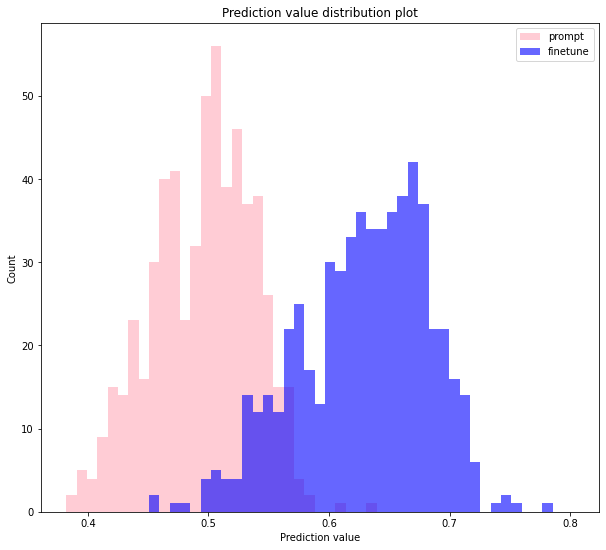

In [ ]:
numBins = 30
fig = plt.figure(figsize = (10,9))
'''
ax_8 = fig.add_subplot(231)
ax_8.hist(finetune_8_df,numBins,color='red',alpha=0.5,label='finetune')
ax_8.hist(prompt_8_df,numBins,color='green',alpha=0.7,label='prompt')
plt.legend()
plt.title('Prediction value distribution plot')
plt.xlabel('Prediction value')
plt.ylabel('Count')


ax_16 = fig.add_subplot(233)
ax_16.hist(finetune_16_df,numBins,color='red',alpha=0.5,label='finetune')
ax_16.hist(prompt_16_df,numBins,color='green',alpha=0.7,label='prompt')
plt.legend()
plt.title('Prediction value distribution plot')
plt.xlabel('Prediction value')
plt.ylabel('Count')

'''

ax = fig.add_subplot(111)
_, bins, _ = ax.hist(prompt_128_df,numBins,color='pink',alpha=0.8,label='prompt')
width = bins[1] - bins[0]
new_centers = bins[-1] + width * np.arange(20)
bins_new = np.hstack((bins,new_centers))
ax.hist(finetune_128_df,bins=bins_new,color='blue',alpha=0.6,label='finetune')
plt.legend()
plt.title('Prediction value distribution plot')
plt.xlabel('Prediction value')
plt.ylabel('Count')


fig.savefig('./logits_plot.pdf')

# Heatmap for mortality 

In [ ]:
# heatmaps
import numpy as np
import seaborn as sns

# mortality -- mixedTemplate + clinicalKnowledgeable 
label_words_mortality = np.array([np.array([' alive', ' back', ' NAD', ' Hypertension', ' Denies', ' old', ' once', ' coronary', ' reports', ' LAD', ' male', ' RA', ' alcohol', ' RRR', ' intact', ' bowel', ' shortness', ' DrugsPHYSICAL', ' cardiac', ' drug', ' This', ' tobacco', ' two', ' died', ' clear', ' recovery']), 
                           np.array([' A', ' failure', ' baseline', ' placed', ' wife', ' family', ' 30', ' lung', ' intubated', ' renal', ' arrival', ' chronic', ' increased', ' recently', ' deceased', ' At', ' only', ' Hospital3', ' w', ' due', ' OSH', ' treated', ' transfer', ' did', ' hospital', ' emergency'])])
label_words_weights_mortality = np.array([np.array([-0.1024, -0.4936, -2.1862, -0.9509, -0.3121, -1.1633,  1.2740,  0.1437,
          0.5639,  1.4511,  1.1359, -0.5221,  0.9499, -1.3802, -0.4174, -1.1962,
         -1.8552, -1.8835, -1.5553, -1.3762,  0.8660,  2.2425, -0.1876, -1.6426,
          0.4951, 2.5671]),
        np.array([-1.3679, -0.4061, -1.0169, -1.8055, -0.1210, -0.0962, -1.8659,  1.9454,
          1.3950,  0.9585, -0.8048, -1.5811, -0.8786, -1.0833,  2.5520, -1.6553,
         -0.6933, -2.0973, -1.2447, -0.1403,  0.7206, -2.0224, -1.6777,  0.0898,
         -2.0973, 1.8329])])

'''# Normalize the weights
exp_ = np.exp(label_words_weights_mortality)
normalizing_factors = exp_.sum(axis=1)
label_words_weights_mortality_0 = exp_[0]/normalizing_factors[0]
label_words_weights_mortality_1 = exp_[1]/normalizing_factors[1]
'''

# label 0
a = np.argsort(label_words_weights_mortality[0])
label_words_mortality_sorted_0 = label_words_mortality[0][a]
label_words_weights_mortality_sorted_0 = label_words_weights_mortality[0][a]

# label 1
a = np.argsort(label_words_weights_mortality[1])
label_words_mortality_sorted_1 = label_words_mortality[1][a]
label_words_weights_mortality_sorted_1 = label_words_weights_mortality[1][a]

'''
for i in [0,1]:
  a = np.argsort(label_words_weights_mortality[i]).tolist()
  print(label_words_weights_mortality[i][a])
  print('*********'*10)
  print(label_words_mortality[i][a])
  print('*********'*10)
'''

"\nfor i in [0,1]:\n  a = np.argsort(label_words_weights_mortality[i]).tolist()\n  print(label_words_weights_mortality[i][a])\n  print('*********'*10)\n  print(label_words_mortality[i][a])\n  print('*********'*10)\n"

## label 0

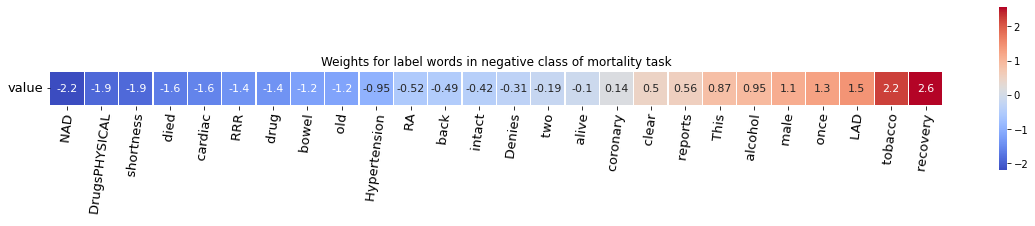

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# label 0
# 单列
df = pd.DataFrame(label_words_weights_mortality_sorted_0)
df.columns = ['logits']
df.index = label_words_mortality_sorted_0
# sns.heatmap(df,square = True)

# 单行
length = label_words_mortality_sorted_0.shape[0]
df = pd.DataFrame(np.arange(length).reshape(1,-1))
df.columns = label_words_mortality_sorted_0
df.index = ['value']
df.iloc[0] = label_words_weights_mortality_sorted_0
plt.figure(figsize=(20,6))
ax = sns.heatmap(df,square = True, annot = True, annot_kws={'size':11}, cbar_kws = {'orientation':'vertical','shrink':0.5}, cmap = 'coolwarm', linewidth = 0.09, linecolor='white')
ax.tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 83)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set(title = 'Weights for label words in negative class of mortality task')
plt.savefig('./mortality_negative.pdf')
# sns.heatmap(df,linewidths=.5,annot_kws={'size':8}) # annot = True

## label 1

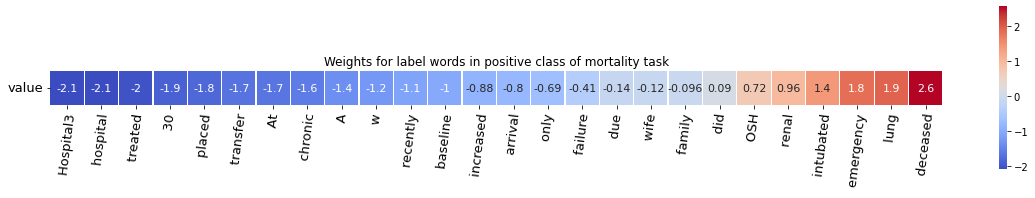

In [ ]:
length = label_words_mortality_sorted_0.shape[0]
df = pd.DataFrame(np.arange(length).reshape(1,-1))
df.columns = label_words_mortality_sorted_1
df.index = ['value']
df.iloc[0] = label_words_weights_mortality_sorted_1
plt.figure(figsize=(20,6))
ax = sns.heatmap(df,square = True, annot = True, annot_kws={'size':11}, cbar_kws = {'orientation':'vertical','shrink':0.5}, cmap = 'coolwarm', linewidth = 0.09, linecolor='white')
ax.tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 83)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set(title = 'Weights for label words in positive class of mortality task')
plt.savefig('./mortality_positive.pdf')
# sns.heatmap(df,linewidths=.5,annot_kws={'size':8}) # annot = True

# Heatmap for readmission

In [ ]:
# heatmaps
import numpy as np
import seaborn as sns

# readmission -- mixedTemplate + clinicalKnowledgeable 

label_words_readmission = np.array([np.array([' social', ' intact', ' head', ' qd', ' not', ' remained', ' appointment', ' bilaterally', ' three', ' post', ' while', ' rate', ' refills2', ' aspirin', ' no', ' take', ' refills0', ' coronary', ' soft', ' atrial', ' never', ' illness', ' recovery', ' bleeding', 'acute']), 
                                    np.array([' r', ' infection', ' units', ' improved', ' effusion', ' bilateral', ' ed', ' abdominal', ' possibly', ' treated', ' respiratory', ' ml', ' bp', ' breath', ' secondary', ' low', ' yes', ' line', ' tid', ' insulin', ' will', ' dose', ' chronic', ' SLE'])])


label_words_weights_readmission = np.array([np.array([ 0.2555,  0.3460,  0.8702, -2.1771, -1.1612,  0.6971,  0.0700,  0.0901,
         -0.3565,  0.2494,  0.5201,  1.3815, -0.7890,  0.8008, -1.0499,  0.3168,
         -0.7890, -0.3532,  0.4729, -1.6643, -1.7061, -1.4395, 3.0121, 2.0139, 2.1194]),
        np.array([ 0.0176,  0.8053,  0.3816,  0.5421, -0.5410,  0.8082, -1.0589, -0.0149,
         -0.7204,  0.9628, -0.8445,  0.9428,  0.5012, -1.1602,  0.0736,  0.0733,
         -0.0905,  0.1578,  0.0833,  0.1814,  0.2671,  0.1051, 1.2310, 1.5285])])



# label 0
a = np.argsort(label_words_weights_readmission[0])
label_words_readmission_sorted_0 = label_words_readmission[0][a]
label_words_weights_readmission_sorted_0 = label_words_weights_readmission[0][a]

# label 1
a = np.argsort(label_words_weights_readmission[1])
label_words_readmission_sorted_1 = label_words_readmission[1][a]
label_words_weights_readmission_sorted_1 = label_words_weights_readmission[1][a]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


## label 0

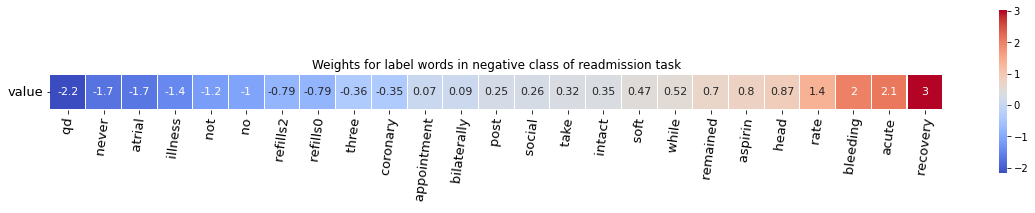

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# label 0
# 单列
df = pd.DataFrame(label_words_weights_readmission_sorted_0)
df.columns = ['logits']
df.index = label_words_readmission_sorted_0
# sns.heatmap(df,square = True)

# 单行
length = label_words_readmission_sorted_0.shape[0]
df = pd.DataFrame(np.arange(length).reshape(1,-1))
df.columns = label_words_readmission_sorted_0
df.index = ['value']
df.iloc[0] = label_words_weights_readmission_sorted_0
plt.figure(figsize=(20,6))
ax = sns.heatmap(df,square = True, annot = True, annot_kws={'size':11}, cbar_kws = {'orientation':'vertical','shrink':0.5}, cmap = 'coolwarm', linewidth = 0.09, linecolor='white')
ax.tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 83)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set(title = 'Weights for label words in negative class of readmission task')
plt.savefig('./readmission_negative.pdf')
# sns.heatmap(df,linewidths=.5,annot_kws={'size':8}) # annot = True

## label 1

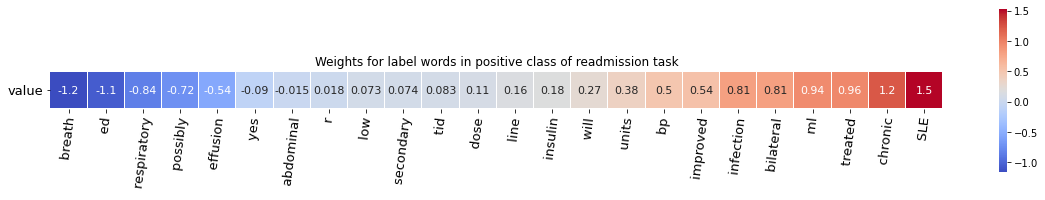

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# label 0
# 单列
df = pd.DataFrame(label_words_weights_readmission_sorted_1)
df.columns = ['logits']
df.index = label_words_readmission_sorted_1
# sns.heatmap(df,square = True)

# 单行
length = label_words_readmission_sorted_1.shape[0]
df = pd.DataFrame(np.arange(length).reshape(1,-1))
df.columns = label_words_readmission_sorted_1
df.index = ['value']
df.iloc[0] = label_words_weights_readmission_sorted_1
plt.figure(figsize=(20,6))
ax = sns.heatmap(df,square = True, annot = True, annot_kws={'size':11}, cbar_kws = {'orientation':'vertical','shrink':0.5}, cmap = 'coolwarm', linewidth = 0.09, linecolor='white')
ax.tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 83)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set(title = 'Weights for label words in positive class of readmission task')
plt.savefig('./readmission_positive.pdf')
# sns.heatmap(df,linewidths=.5,annot_kws={'size':8}) # annot = True